In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/ds_salaries (1).csv")

In [ ]:
df_new=df

In [ ]:
df_new.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df_new.shape

(3755, 11)

In [ ]:
df_new.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
df_new.duplicated().sum()

1171

In [ ]:
df_new.drop_duplicates(inplace=True)

In [ ]:
df_new.shape

(2584, 11)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [ ]:
for i in df_new.columns:
  if df_new[i].dtype== 'object':
    df[i]=df[i].astype('category')

In [ ]:
df_new.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
df_2023 = df_new[df_new['work_year'] == 2023]

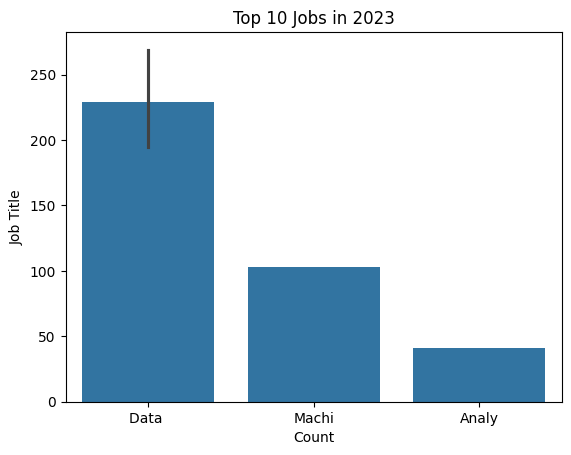

In [ ]:
top_5_jobs_2023 = df_2023['job_title'].value_counts().nlargest(5).reset_index()
top_5_jobs_2023.columns = ['job_title', 'count']
top_5_jobs_2023['job_title'] = top_5_jobs_2023['job_title'].str[:5]
# Plot the data
sns.barplot(top_5_jobs_2023, x='job_title', y='count')
plt.title("Top 10 Jobs in 2023")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

In [ ]:
# Sorted unique values of experience levels
sorted_experience_levels = sorted(df['experience_level'].unique())
print(sorted_experience_levels)


['EN', 'EX', 'MI', 'SE']


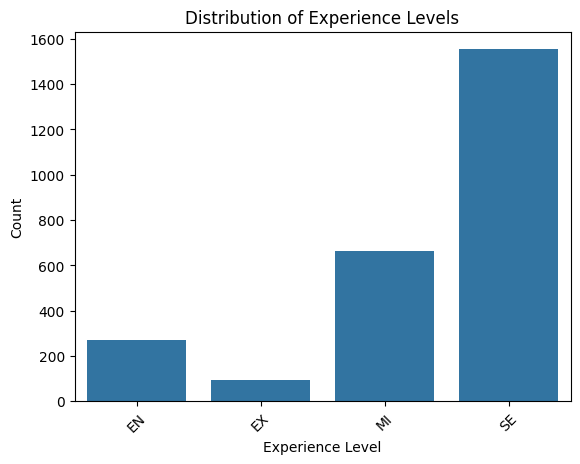

In [ ]:
# Count the number of occurrences of each experience level
experience_counts = df['experience_level'].value_counts().reset_index()
experience_counts.columns = ['experience_level', 'count']

# Plot the data
sns.barplot(data=experience_counts, x='experience_level', y='count')
plt.title("Distribution of Experience Levels")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels if needed for readability
plt.show()



In [ ]:
# Sorted unique values of employment types
sorted_employment_types = sorted(df['employment_type'].unique())
print(sorted_employment_types)


['CT', 'FL', 'FT', 'PT']


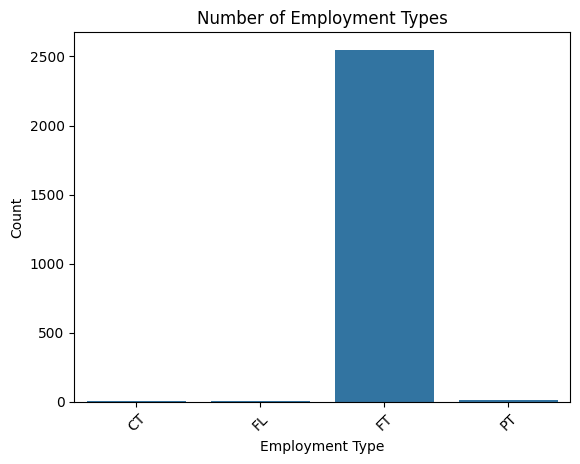

In [ ]:
# Count the number of occurrences of each employment type
employment_counts = df['employment_type'].value_counts().reset_index()
employment_counts.columns = ['employment_type', 'count']

# Plot the data
sns.barplot(data=employment_counts, x='employment_type', y='count')
plt.title("Number of Employment Types")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels if needed for readability
plt.show()


<ipython-input-24-231396b207c6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_salaries = df.groupby('job_title')['salary'].mean().reset_index()


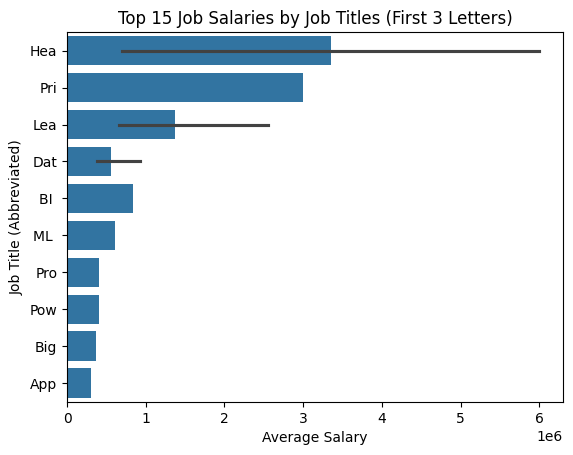

In [ ]:
# Group by job title and calculate average salary
top_salaries = df.groupby('job_title')['salary'].mean().reset_index()

# Sort to get the top 15 job titles by average salary
top_salaries = top_salaries.sort_values(by='salary', ascending=False).head(15)

# Keep only the first 3 letters of each job title
top_salaries['job_title'] = top_salaries['job_title'].str[:3]

# Plot the data as a horizontal bar plot
sns.barplot(data=top_salaries, y='job_title', x='salary')
plt.title("Top 15 Job Salaries by Job Titles (First 3 Letters)")
plt.xlabel("Average Salary")
plt.ylabel("Job Title (Abbreviated)")
plt.show()



In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


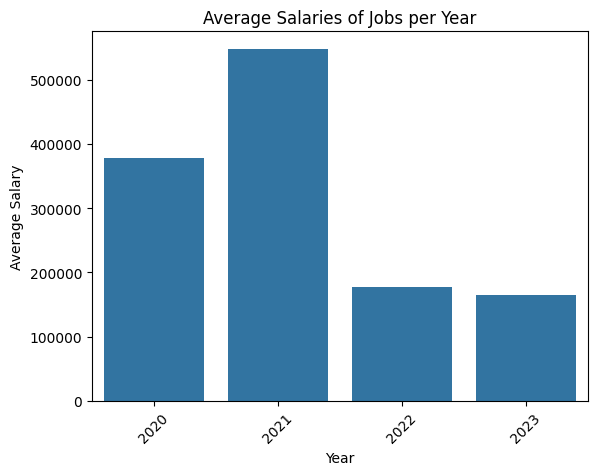

In [ ]:
# Group by year and calculate the average salary
average_salaries_per_year = df.groupby('work_year')['salary'].mean().reset_index()

# Plot the data
sns.barplot(data=average_salaries_per_year, x='work_year', y='salary')
plt.title("Average Salaries of Jobs per Year")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)  # Rotate labels if needed for better readability
plt.show()


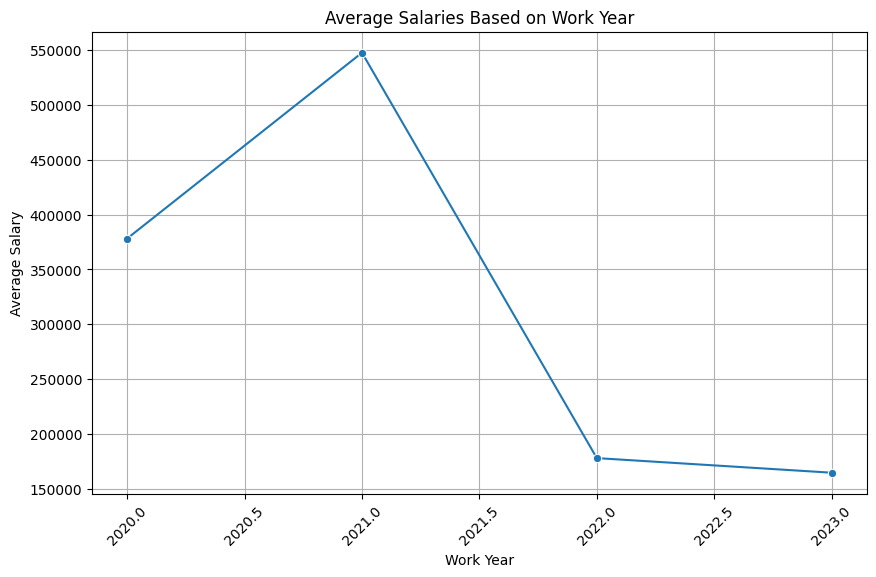

In [ ]:
# Group by work year and calculate the average salary
average_salaries_per_year = df.groupby('work_year')['salary'].mean().reset_index()

# Plot the data using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_salaries_per_year, x='work_year', y='salary', marker='o')
plt.title("Average Salaries Based on Work Year")
plt.xlabel("Work Year")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)  # Rotate labels if needed for better readability
plt.grid()  # Optional: Add grid lines for better readability
plt.show()
